# Regularized Regression

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preliminary Flow

### Load Data & Preprocessing

In [184]:
# load data
df_base = pd.read_csv('/content/drive/MyDrive/project/data_science/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-tahun-2021.csv')
df_base.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,location
0,2021-01-01,43,58,29,35,65,65,O3,SEDANG,DKI2
1,2021-01-02,58,86,38,64,80,86,PM25,SEDANG,DKI3
2,2021-01-03,64,93,25,62,86,93,PM25,SEDANG,DKI3
3,2021-01-04,50,67,24,31,77,77,O3,SEDANG,DKI2
4,2021-01-05,59,89,24,35,77,89,PM25,SEDANG,DKI3


In [185]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   365 non-null    object
 1   pm10      365 non-null    int64 
 2   so2       365 non-null    int64 
 3   co        365 non-null    int64 
 4   o3        365 non-null    int64 
 5   no2       365 non-null    int64 
 6   max       365 non-null    int64 
 7   critical  365 non-null    object
 8   categori  365 non-null    object
 9   location  365 non-null    object
dtypes: int64(6), object(4)
memory usage: 28.6+ KB


In [186]:
# check null
df_base.isnull().sum()

tanggal     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
location    0
dtype: int64

In [187]:
# check duplicate
df_base.duplicated().sum()

0

In [188]:
# let's check unique value of categori
df_base['categori'].unique()

array(['SEDANG', 'TIDAK SEHAT', 'BAIK'], dtype=object)

In [189]:
# change tanggal type to datetime first
df_base['tanggal'] = pd.to_datetime(df_base['tanggal'])
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   365 non-null    datetime64[ns]
 1   pm10      365 non-null    int64         
 2   so2       365 non-null    int64         
 3   co        365 non-null    int64         
 4   o3        365 non-null    int64         
 5   no2       365 non-null    int64         
 6   max       365 non-null    int64         
 7   critical  365 non-null    object        
 8   categori  365 non-null    object        
 9   location  365 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 28.6+ KB


### Review Air Condition That Occured
This section let us know that how the condition of air as time goes by in Jakarta per 2021 by some parameters.
We are going to see pm10 (air particle which has size less than 10 micrometers) , O3 (ozone) , SO2 (Sulfur Dioxide) and CO (Carbon Monoxide).

Source :
  *   pm10 : https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm10.bmkg
  *   o3 : https://www.bmkg.go.id/kualitas-udara/informasi-ozon.bmkg
  *   SO2 : https://www.bmkg.go.id/kualitas-udara/informasi-so2.bmkg
  *   CO : https://www.health.state.mn.us/communities/environment/air/toxins/index.html



#### PM10

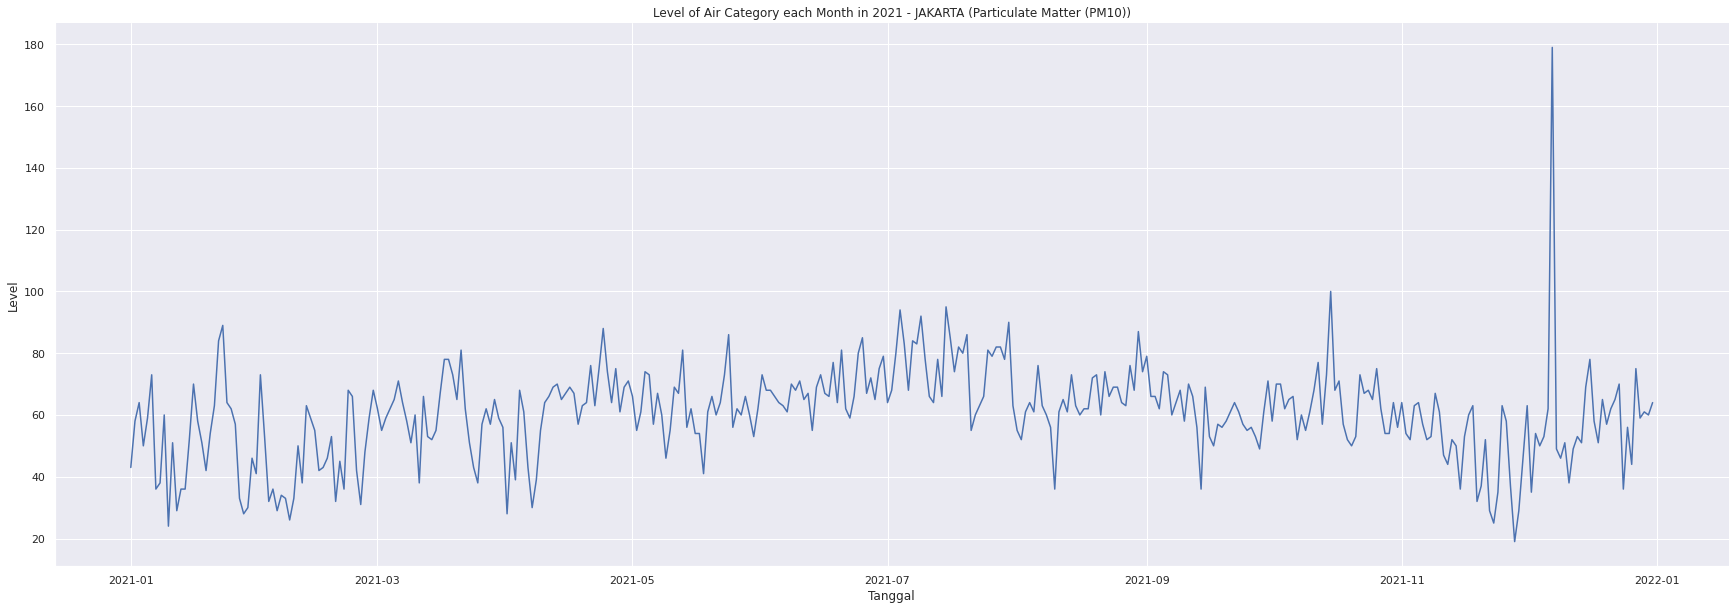

In [190]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x='tanggal', y='pm10', data=df_base)

# Customize the axes and title
ax.set_title("Level of Air Category each Month in 2021 - JAKARTA (Particulate Matter (PM10))")
ax.set_ylabel("Level")
ax.set_xlabel("Tanggal")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### O3 (Ozone)

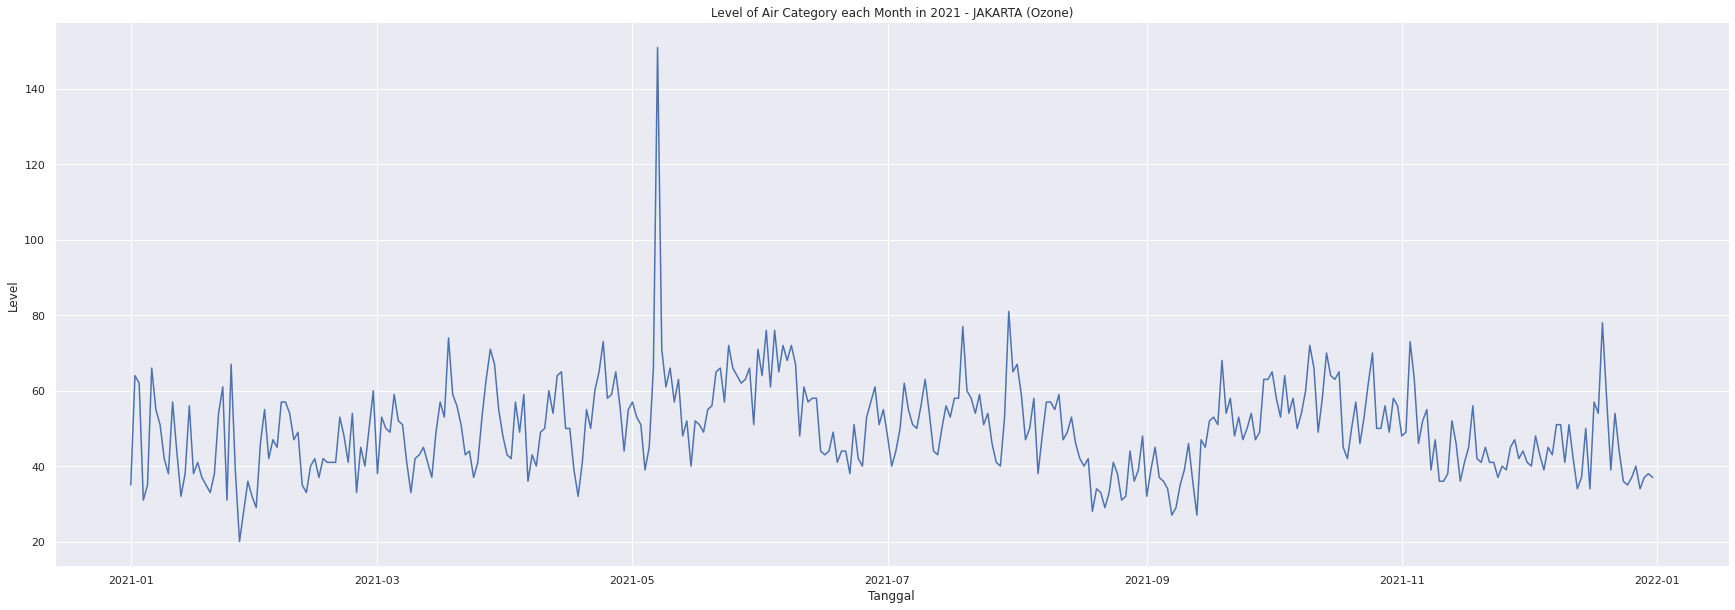

In [191]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x='tanggal', y='o3', data=df_base)

# Customize the axes and title
ax.set_title("Level of Air Category each Month in 2021 - JAKARTA (Ozone)")
ax.set_ylabel("Level")
ax.set_xlabel("Tanggal")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### SO2 (Sulfur Dioxide)

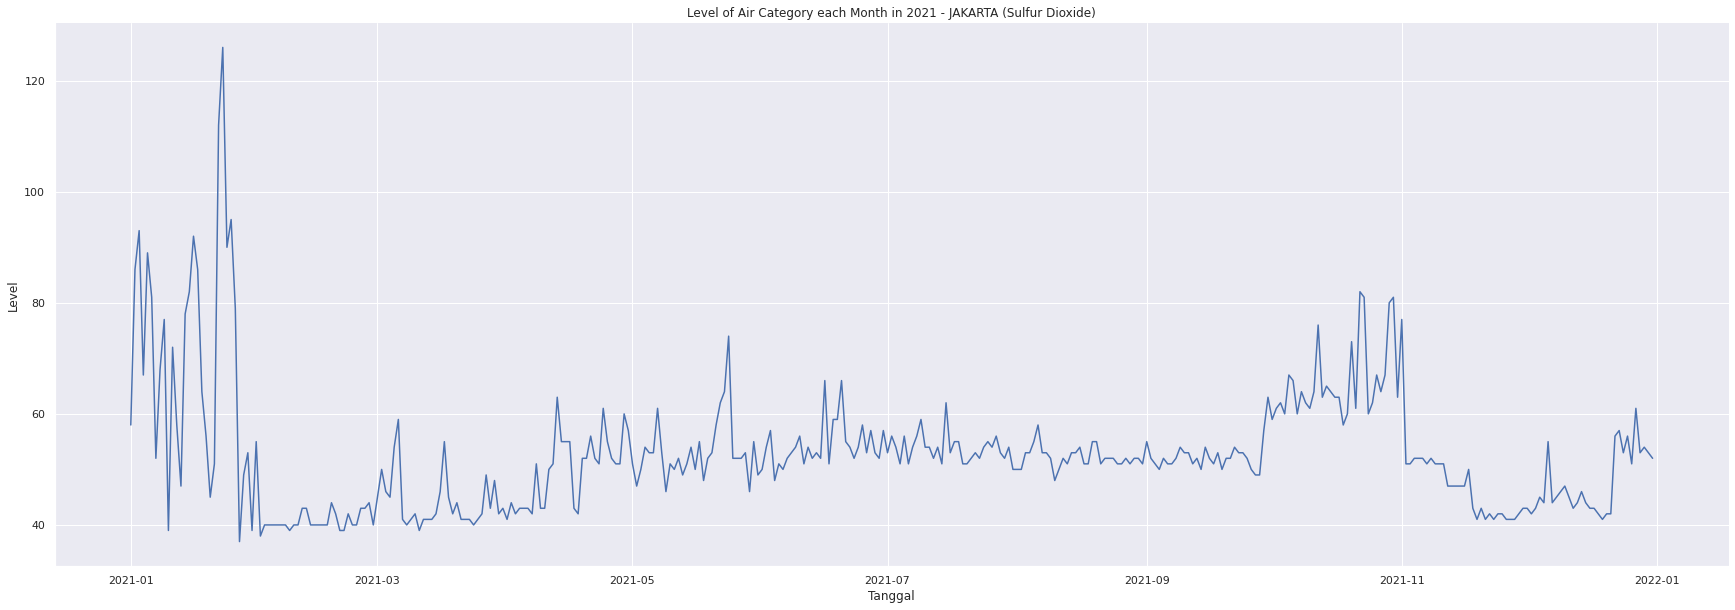

In [192]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x='tanggal', y='so2', data=df_base)
# Customize the axes and title
ax.set_title("Level of Air Category each Month in 2021 - JAKARTA (Sulfur Dioxide)")
ax.set_ylabel("Level")
ax.set_xlabel("Tanggal")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### CO (Carbon Monoxide)

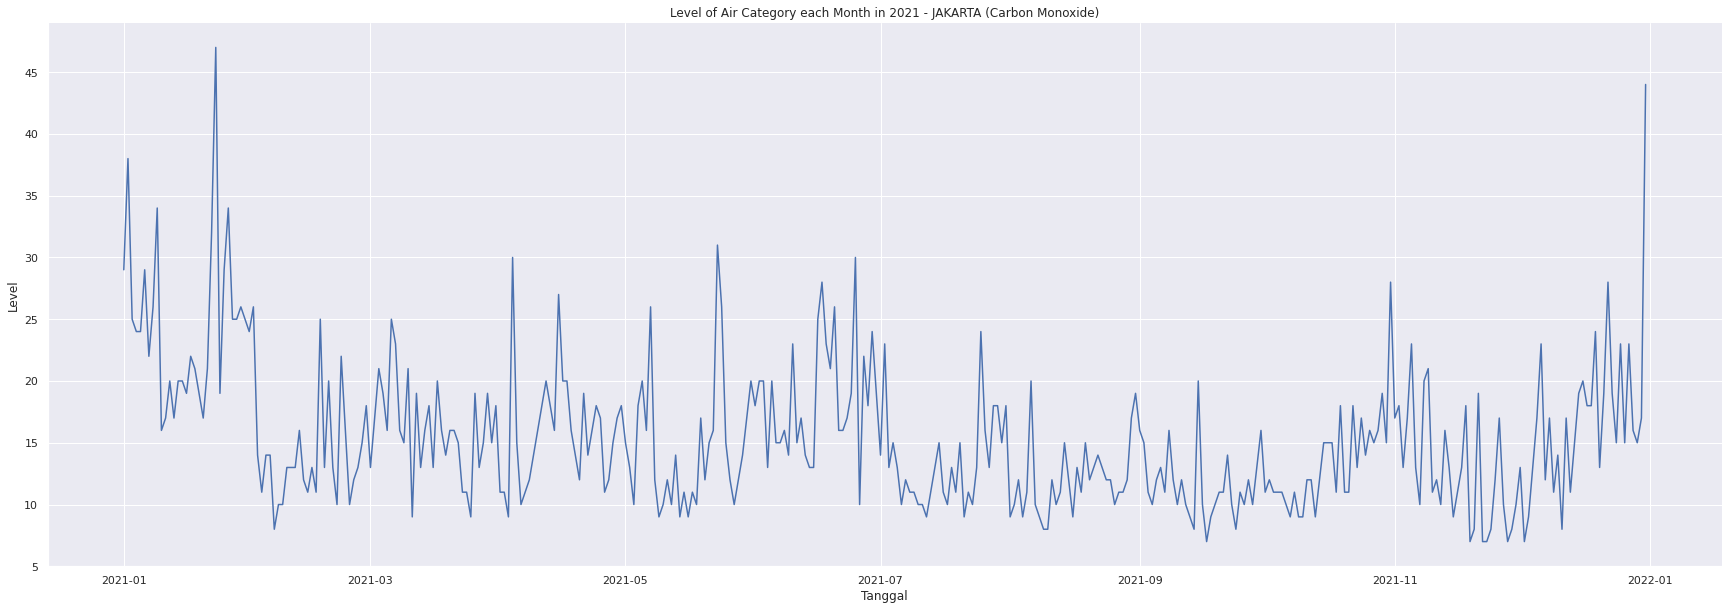

In [193]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x='tanggal', y='co', data=df_base)

# Customize the axes and title
ax.set_title("Level of Air Category each Month in 2021 - JAKARTA (Carbon Monoxide)")
ax.set_ylabel("Level")
ax.set_xlabel("Tanggal")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Category per Month
We also can identify how lethal the air per category each month
*   Green means Good / BAIK
*   Blue means Average / SEDANG
*   Orange Means Bad / TIDAK BAIK

In [194]:
# add month to categorize later
df_base['mth'] = pd.DatetimeIndex(df_base['tanggal']).month

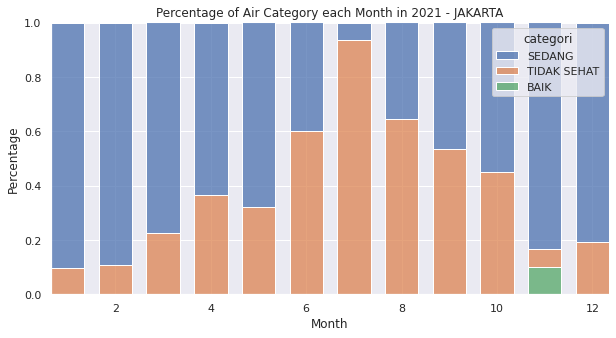

In [195]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.histplot(
          data=df_base,
          x="mth", hue="categori",
          multiple="fill", stat="density",
          discrete=True, shrink=.7
      )
# Customize the axes and title
ax.set_title("Percentage of Air Category each Month in 2021 - JAKARTA")
ax.set_ylabel("Percentage")
ax.set_xlabel("Month")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

The air condition gets worse up to the middle of year. The worst one was in July 2021

### Continue Preprocessing Data

In [196]:
# let's enumerate each categori
map_class = {'SEDANG':3,
             'TIDAK SEHAT':2,
             'BAIK':1}
df_base['air_cat'] = df_base['categori'].map(map_class)

In [197]:
# let's drop tanggal, critical, and lokasi
# because we are going to define model to determine
# the category of air quality

df_base.drop(columns=['tanggal','categori','critical','location','mth'], inplace=True)

### Split Data

In [198]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_base.drop(columns='air_cat')
target = df_base[['air_cat']]

feature_category_pretrain, feature_category_test, target_category_pretrain, target_category_test = train_test_split(feature, target, test_size=0.20, random_state=42)
feature_category_train, feature_category_validation, target_category_train, target_category_validation = train_test_split(feature_category_pretrain, target_category_pretrain, test_size=0.20, random_state=42)

In [199]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_category_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,pm10,4.312754
2,so2,1.810949
3,co,2.545576
4,o3,1.159161
5,no2,3.334748
6,max,4.296637


At the first glance, nothing seems to be at high VIF , but `pm10` and `max` has close value. We need to inspect more detailed

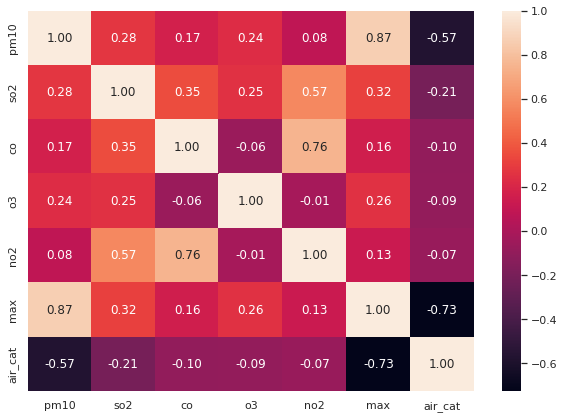

In [200]:
# heatmap correlation
category_train = pd.concat([feature_category_train, target_category_train], axis=1)
corr = category_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

`pm10` is highly `collerated` to `max` ,
but none has high correlation to air_category ( > +/- 0.8 )

No need to drop at all

## Model Training

### Ridge Regression

In [201]:
from sklearn.linear_model import Ridge

# train the model
X_category_train = feature_category_train.to_numpy()
y_category_train = target_category_train.to_numpy()
y_category_train = y_category_train.reshape(len(y_category_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

ridge_reg_pointzeroone.fit(X_category_train, y_category_train)
ridge_reg_pointone.fit(X_category_train, y_category_train)
ridge_reg_one.fit(X_category_train, y_category_train)
ridge_reg_ten.fit(X_category_train, y_category_train)

Ridge(alpha=10, random_state=42)

In [202]:
# check RMSE
from sklearn.metrics import mean_squared_error

X_category_validation = feature_category_validation.to_numpy()
y_category_validation = target_category_validation.to_numpy()
y_category_validation = y_category_validation.reshape(len(y_category_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_category_validation)
    rmse = np.sqrt(mean_squared_error(y_category_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.28910676314884615
RMSE of Ridge regression model with alpha = 0.1 is 0.2891069750860676
RMSE of Ridge regression model with alpha = 1.0 is 0.2891090942431286
RMSE of Ridge regression model with alpha = 10 is 0.2891302643475779


### Lasso

In [203]:
from sklearn.linear_model import Lasso

# train the model
X_category_train = feature_category_train.to_numpy()
y_category_train = target_category_train.to_numpy()
y_category_train = y_category_train.reshape(len(y_category_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_category_train, y_category_train)
lasso_reg_pointone.fit(X_category_train, y_category_train)
lasso_reg_one.fit(X_category_train, y_category_train)
lasso_reg_ten.fit(X_category_train, y_category_train)

Lasso(alpha=10, random_state=42)

In [204]:
from sklearn.metrics import mean_squared_error

# check RMSE for Lasso

X_category_validation = feature_category_validation.to_numpy()
y_category_validation = target_category_validation.to_numpy()
y_category_validation = y_category_validation.reshape(len(y_category_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_category_validation)
    rmse = np.sqrt(mean_squared_error(y_category_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 0.28978977431488645
RMSE of Lasso regression model with alpha = 0.1 is 0.2938329246235932
RMSE of Lasso regression model with alpha = 1.0 is 0.31329498602431877
RMSE of Lasso regression model with alpha = 10 is 0.4994412358566403


### Note : The less RMSE , the better

## Model Evaluation

### Ridge

In [205]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_category_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.796501
1,pm10,0.008660
2,so2,-0.001679
3,co,-0.002451
4,o3,0.004762
5,no2,0.002508
6,max,-0.020273


### Lasso

In [206]:
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_category_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.786178
1,pm10,0.008262
2,so2,-0.001317
3,co,-0.001146
4,o3,0.004643
5,no2,0.001978
6,max,-0.020066


### Training Error

#### Ridge

In [207]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_category_train)

In [208]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_category_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_category_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_category_train, y_predict_train)))

RMSE for training data is 0.329488140079304
MAE for training data is 0.2554436437733334
MAPE for training data is 0.11130296502775924


#### Lasso

In [209]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_category_train)

In [210]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_category_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_category_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_category_train, y_predict_train)))

RMSE for training data is 0.32953258290938214
MAE for training data is 0.25580148236544953
MAPE for training data is 0.1114816893829555


### Testing Error

#### Ridge

In [211]:
# prepare prediction result on test data
X_category_test = feature_category_test.to_numpy()
y_predict_test = ridge_best.predict(X_category_test)

# ground truth target
y_category_test = target_category_test.to_numpy()
y_category_test = y_category_test.reshape(len(y_category_test),)

In [212]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_category_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_category_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_category_test, y_predict_test)))

RMSE for testing data is 0.465466978795899
MAE for testing data is 0.2945713130131657
MAPE for testing data is 0.15715649110653593


In [213]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_category_test, y_predict_test)
mean_absolute_percentage_error(y_category_test, y_predict_test)

0.15715649110653593

#### Lasso

In [214]:
# prepare prediction result on test data
X_category_test = feature_category_test.to_numpy()
y_predict_test = lasso_best.predict(X_category_test)

# ground truth target
y_category_test = target_category_test.to_numpy()
y_category_test = y_category_test.reshape(len(y_category_test),)

In [215]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_category_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_category_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_category_test, y_predict_test)))

RMSE for testing data is 0.46579685768971096
MAE for testing data is 0.2945919131280197
MAPE for testing data is 0.15721658038119474


In [216]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_category_test, y_predict_test)
mean_absolute_percentage_error(y_category_test, y_predict_test)

0.15721658038119474

## Best Model
According to the test above, best model can be obtained by using Ridge Regression with error tolerance around 15.7% which means has 84.3% probability being effective for the rest of data.



> **equation = 3.796501 + 0.008660 * pm10 - 0.001679 * so - 0.002451 * co + 0.004762 * o3 + 0.002508 * no2 - 0.020273 * max**

# Question

1. Assuming no changes on our behaviour, will the air get better by it's own ?

> ANS : By looking at this data, yes. But it can't be the sole factor for us to determine that the air will be better in coming years. There are much more external variables in this case.

2. What is the most significant factor to determine air quality ?

> ANS : All the factor above , have more or less , same effect on air condition. We can see in the model interpretation , each factor has similar coefficient.

# Conclusion
*  Regression is more or less enough because we are dealing with numeric values
*  Ridge Regression method works slightly better than Lasso method
*  In 2021, Jakarta has quite a bad air quality for a whole year in 2021